## Building ARMA, ARIMA & SARIMA Models to forecast BTC prices

In [4]:
# Reading in BTC Price data

import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
btc = web.get_data_yahoo(['BTC-USD'], start = datetime.datetime(2018, 1, 1), end = datetime.datetime(2020, 12, 2))['Close']
btc

Symbols,BTC-USD
Date,
2017-12-31,14156.400391
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000
2018-01-06,17527.000000
2018-01-07,16477.599609
2018-01-08,15170.099609


In [7]:
btc.to_csv('btc.csv')
btc = pd.read_csv('btc.csv')
btc.head()

,Date,BTC-USD
0,2017-12-31,14156.400391
1,2018-01-01,13657.200195
2,2018-01-02,14982.099609
3,2018-01-03,15201.000000
4,2018-01-04,15599.200195


In [8]:
# Making 'Date' into the index of our dataframe

btc.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')
del btc['Date']
btc

,BTC-USD
Date,
2017-12-31,14156.400391
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000
2018-01-06,17527.000000
2018-01-07,16477.599609
2018-01-08,15170.099609


Visualizing our data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

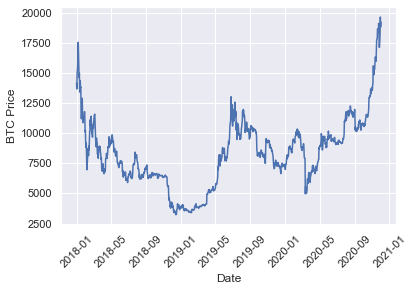

In [10]:
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['BTC-USD'], )

Splitting our data in training and testing

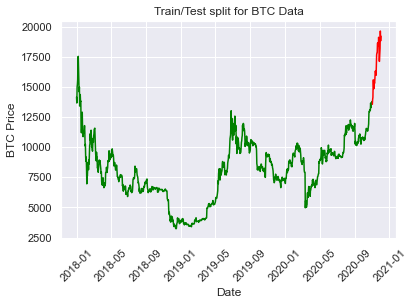

In [11]:
train = btc[btc.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = btc[btc.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "green")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

We will now forecast prices with 3 models: ARMA, ARIMA & SARIMA

In [12]:
# We will define an ARMA Model using the SARIMAX Package
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [13]:
# Defining the input for our model
y = train['BTC-USD']

In [14]:
# For defining an ARMA model we specify the order parameters as (1, 0, 1)

ARMAmodel = SARIMAX(y, order=(1,0,1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

y_pred_out

/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25882D+00    |proj g|=  1.44174D-03

At iterate    5    f=  7.25827D+00    |proj g|=  4.20963D-03

At iterate   10    f=  7.25824D+00    |proj g|=  6.57264D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     17      1     0     0   6.573D-05   7.258D+00
  F =   7.2582357374135613     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


Date
2020-11-02    13764.076527
2020-11-03    13757.959205
2020-11-04    13751.844602
2020-11-05    13745.732716
2020-11-06    13739.623547
2020-11-07    13733.517092
2020-11-08    13727.413352
2020-11-09    13721.312325
2020-11-10    13715.214009
2020-11-11    13709.118403
2020-11-12    13703.025507
2020-11-13    13696.935318
2020-11-14    13690.847836
2020-11-15    13684.763060
2020-11-16    13678.680988
2020-11-17    13672.601619
2020-11-18    13666.524952
2020-11-19    13660.450986
2020-11-20    13654.379719
2020-11-21    13648.311151
2020-11-22    13642.245280
2020-11-23    13636.182104
2020-11-24    13630.121624
2020-11-25    13624.063837
2020-11-26    13618.008742
2020-11-27    13611.956338
2020-11-28    13605.906625
2020-11-29    13599.859600
2020-11-30    13593.815262
2020-12-01    13587.773611
2020-12-02    13581.734645
Name: Predictions, dtype: float64

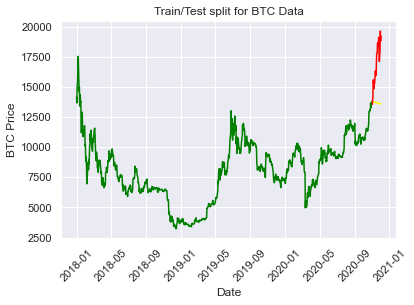

In [15]:
plt.plot(train, color = "green")
plt.plot(y_pred_out, color='yellow', label = 'Predictions')
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()


We will now evaluate the performance of the model with RSME

In [16]:
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE:",arma_rmse)

RMSE: 3646.0004360731978


We can see that the RSME very high, which is evident from the plot. This can be attributed to ARMA not being able to capture seasonality and it cannot be used for non-stationary time series data.

We will now try ARIMA which doesn't assume stationarity but assumes that the data exhibits little to no seasonality

In [17]:
from statsmodels.tsa.arima.model import ARIMA

/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE:  3514.869553679533


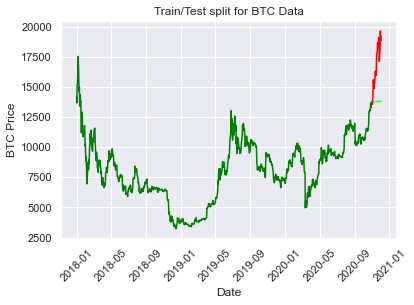

In [18]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred_arima = ARIMAmodel.get_forecast(len(test.index))
y_pred_df_arima = y_pred_arima.conf_int(alpha = 0.05)
y_pred_df_arima["Predictions"] = ARIMAmodel.predict(start = y_pred_df_arima.index[0], end = y_pred_df_arima.index[-1])
y_pred_df_arima.index = test.index
y_pred_out_arima = y_pred_df_arima["Predictions"]

plt.plot(train, color = "green")
plt.plot(y_pred_out, color='yellow', label = 'Predictions')
plt.plot(y_pred_out_arima, color='cyan', label = 'ARIMA Predictions')
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")

arima_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df_arima["Predictions"]))
print("RMSE: ",arima_rmse)

/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE:  2934.16173125584


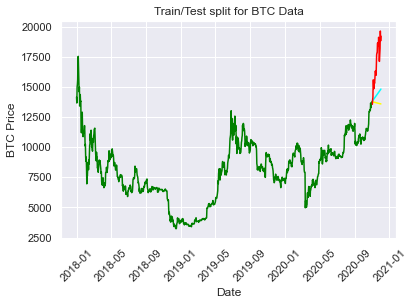

In [19]:
# Let's try changing the parameters

ARIMAmodel = ARIMA(y, order = (2, 3, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred_arima = ARIMAmodel.get_forecast(len(test.index))
y_pred_df_arima = y_pred_arima.conf_int(alpha = 0.05)
y_pred_df_arima["Predictions"] = ARIMAmodel.predict(start = y_pred_df_arima.index[0], end = y_pred_df_arima.index[-1])
y_pred_df_arima.index = test.index
y_pred_out_arima = y_pred_df_arima["Predictions"]

plt.plot(train, color = "green")
plt.plot(y_pred_out, color='yellow', label = 'Predictions')
plt.plot(y_pred_out_arima, color='cyan', label = 'ARIMA Predictions')
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")

arima_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df_arima["Predictions"]))
print("RMSE: ",arima_rmse)

/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE:  905.074021082341


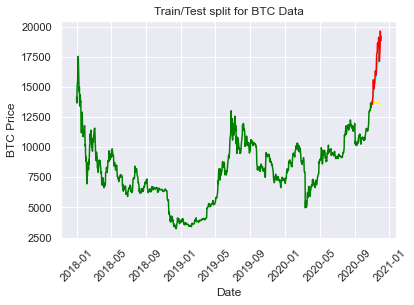

In [33]:
ARIMAmodel = ARIMA(y, order = (5, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred_arima = ARIMAmodel.get_forecast(len(test.index))
y_pred_df_arima = y_pred_arima.conf_int(alpha = 0.05)
y_pred_df_arima["Predictions"] = ARIMAmodel.predict(start = y_pred_df_arima.index[0], end = y_pred_df_arima.index[-1])
y_pred_df_arima.index = test.index
y_pred_out_arima = y_pred_df_arima["Predictions"]

plt.plot(train, color = "green")
plt.plot(y_pred_out, color='yellow', label = 'Predictions')
plt.plot(y_pred_out_arima, color='cyan', label = 'ARIMA Predictions')
plt.plot(test, color = "red", label = 'Test Data')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")

arima_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df_arima["Predictions"]))
print("RMSE: ",arima_rmse)

With some tuning we get a good result and our RMSE is 905. Let us see how it is with SARIMA.

/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37872D+00    |proj g|=  2.39020D-02

At iterate    5    f=  7.37805D+00    |proj g|=  7.68744D-04

At iterate   10    f=  7.37757D+00    |proj g|=  1.70582D-02

At iterate   15    f=  7.36548D+00    |proj g|=  5.84631D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   5.861D-06   7.362D+00
  F =   7.3619532766632867     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RMSE:  1

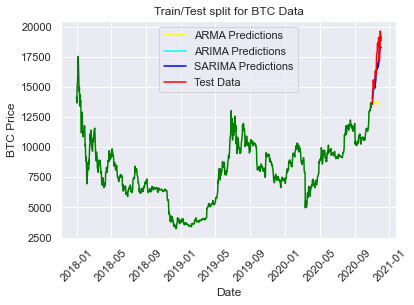

In [32]:
SARIMAXmodel = SARIMAX(y, order = (1, 1, 0), seasonal_order=(1,1,0,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred_sarima = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.plot(train, color = "green")
plt.plot(y_pred_out, color='yellow', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='cyan', label = 'ARIMA Predictions')
plt.plot(y_pred_out_sarima, color='Blue', label = 'SARIMA Predictions')
plt.plot(test, color = "red", label = 'Test Data')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.legend()

sarima_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df_sarima["Predictions"]))
print("RMSE: ",sarima_rmse)